\#**Classificação de amostras de Plantas Iris** <br>


<b>Resumo:</b>

O objetivo analisar os atributos do dataset Iris <br>

<b>Data set URL : </b>

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset


<b>Descrição:</b>

Este projeto é realizado para  a disciplina Tópicos Especiais em Computação I (Introdução à Ciência de Dados).

<b>Número de Instâncias:</b>

150 (50 in each of three classes)

<b>Atributos:</b>
<li>comprimento da sépala em cm
<li>largura da sépala em cm
<li>comprimento da pétala em cm
<li>largura da pétala em cm




## <b>Importando Bibliotecas

In [116]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import math
from scipy.stats import kurtosis, skew
%matplotlib inline

## <b>Carregando a Base de Dados


In [117]:
# carregando dataset Iris
from sklearn.datasets import load_iris
dataIris = load_iris()

In [118]:
data1 = pd.DataFrame(data= np.c_[dataIris['data'], dataIris['target']],
                     columns= dataIris['feature_names'] + ['target'])

In [119]:
print(dataIris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [120]:
print(dataIris['data'][:2])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]


Em qual grupo cada ponto de dados está (0, 1 ou 2)

In [121]:
print(dataIris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 Convertendo dados em um quadro de dados

In [122]:
data = pd.DataFrame(dataIris['data'], columns=dataIris['feature_names'])

In [123]:
target = pd.DataFrame(dataIris['target'], columns=['class'])

In [124]:
df = pd.concat([target, data], axis='columns')

In [125]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# **Exploração de dados**

Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

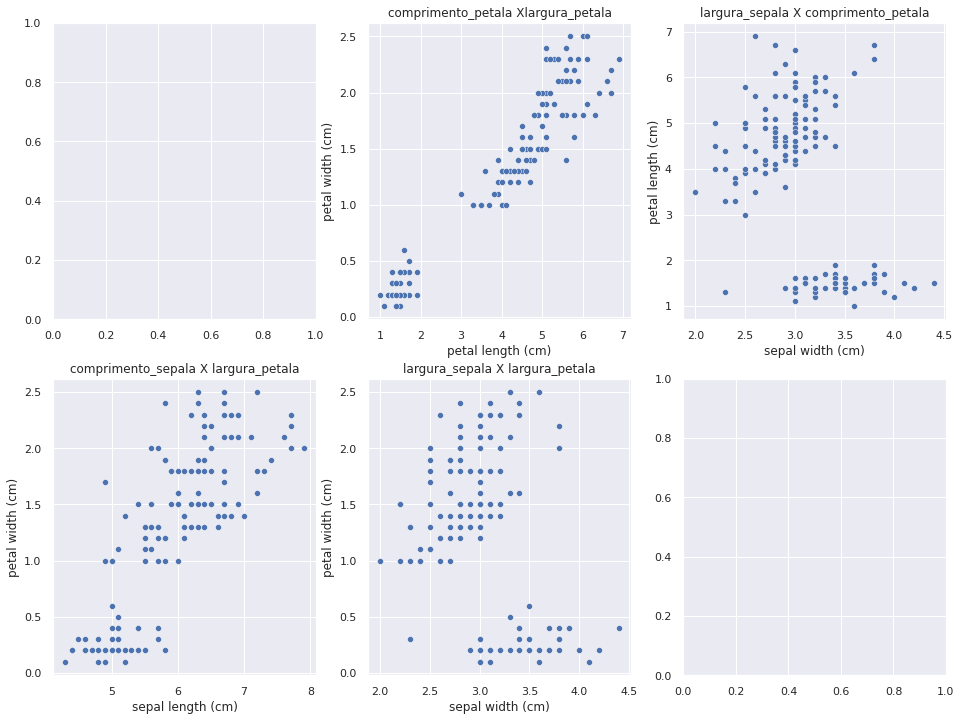

In [130]:
fig, axes = plt.subplots(2, 3, figsize=(16,12))
sns.scatterplot(  data1['petal length (cm)'], data1['petal width (cm)'], data=data1 , ax=axes[0, 1]).set_title('comprimento_petala Xlargura_petala')
sns.scatterplot(  data1['sepal length (cm)'], data1['petal width (cm)'], data=data1 , ax=axes[1, 0]).set_title('comprimento_sepala X largura_petala')
sns.scatterplot(  data1['sepal width (cm)'], data1['petal width (cm)'], data=data1 , ax=axes[1, 1]).set_title('largura_sepala X largura_petala')
sns.scatterplot(  data1['sepal width (cm)'],data1['petal length (cm)'], data=data1 , ax=axes[0, 2]).set_title('largura_sepala X comprimento_petala')
plt.show()

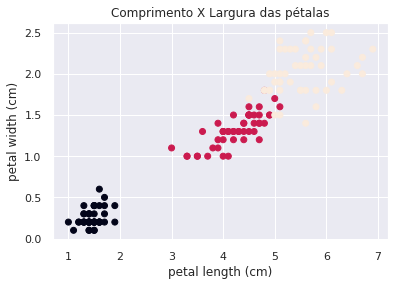

In [135]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['class'])
plt.title('Comprimento X Largura das pétalas')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [136]:
df.head(10)

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
5,0,5.4,3.9,1.7,0.4
6,0,4.6,3.4,1.4,0.3
7,0,5.0,3.4,1.5,0.2
8,0,4.4,2.9,1.4,0.2
9,0,4.9,3.1,1.5,0.1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              150 non-null    int64  
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [138]:
df.describe

<bound method NDFrame.describe of      class  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0        0                5.1               3.5                1.4   
1        0                4.9               3.0                1.4   
2        0                4.7               3.2                1.3   
3        0                4.6               3.1                1.5   
4        0                5.0               3.6                1.4   
..     ...                ...               ...                ...   
145      2                6.7               3.0                5.2   
146      2                6.3               2.5                5.0   
147      2                6.5               3.0                5.2   
148      2                6.2               3.4                5.4   
149      2                5.9               3.0                5.1   

     petal width (cm)  
0                 0.2  
1                 0.2  
2                 0.2  
3                 0.2  
4    

## <b>Verificar Valores nulos

In [140]:
data1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Esta função conta as colunas que contêm valor nulo, mas aqui parece que os dados são pré-processados ​​e limpos com valores nulos.

## **Informações estatísticas para conjunto de dados**

In [141]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [144]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


##**Aprendendo sobre o atributo **petal length****





Transformando os dados para o formato numérico

In [145]:
df['petal length (cm)']=pd.to_numeric(df['petal length (cm)'],errors='coerce')

In [151]:
data1['petal length (cm)'].value_counts().sort_index()

1.0     1
1.1     1
1.2     2
1.3     7
1.4    13
1.5    13
1.6     7
1.7     4
1.9     2
3.0     1
3.3     2
3.5     2
3.6     1
3.7     1
3.8     1
3.9     3
4.0     5
4.1     3
4.2     4
4.3     2
4.4     4
4.5     8
4.6     3
4.7     5
4.8     4
4.9     5
5.0     4
5.1     8
5.2     2
5.3     2
5.4     2
5.5     3
5.6     6
5.7     3
5.8     3
5.9     2
6.0     2
6.1     3
6.3     1
6.4     1
6.6     1
6.7     2
6.9     1
Name: petal length (cm), dtype: int64

Gráfico de barras do atributo alcohol das 25 primeiras amostras

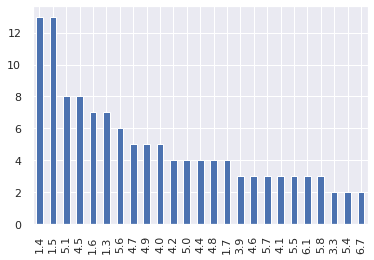

In [150]:
data1['petal length (cm)'].value_counts().head(25).plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


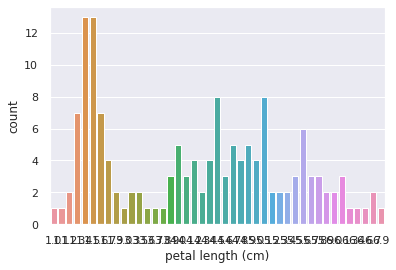

In [184]:
sns.countplot(data1['petal length (cm)'],data=data1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


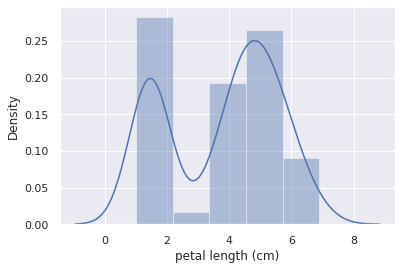

In [153]:
sns.distplot(data['petal length (cm)'])

O Countplot é um gráfico em formato de barra, onde “x” é o atributo escolhido, e “y” é a quantidade de vezes que esse atributo aparece.

Text(0.5, 1.0, 'As 30 medidas mais frequentes do atributo Petal Length')

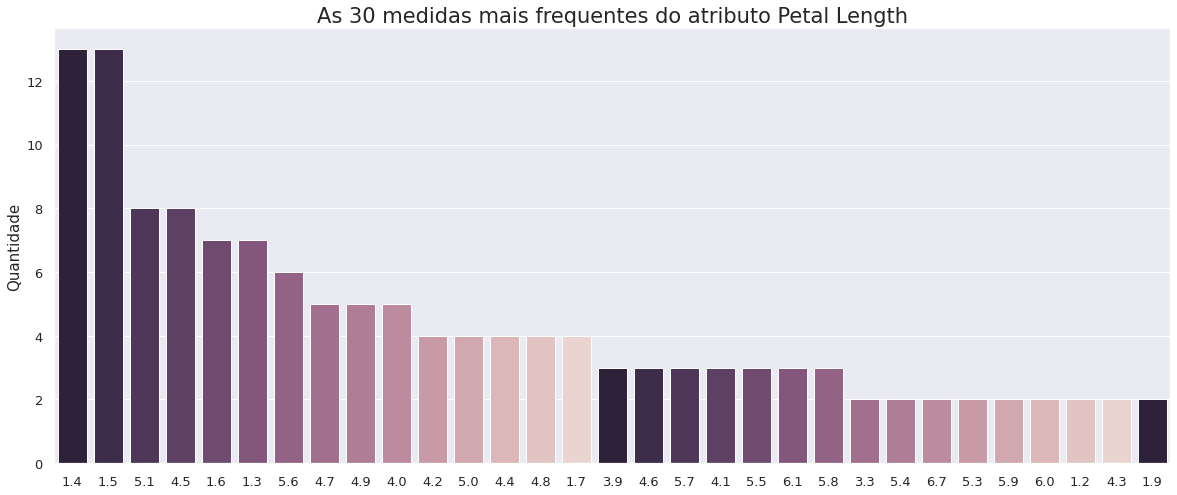

In [188]:
palette_genre_cubehelix = sns.cubehelix_palette(15,reverse=True)
fig = plt.figure(figsize=(20,8))
sns.countplot(x=data['petal length (cm)'], order = data['petal length (cm)'].value_counts().index ,palette=palette_genre_cubehelix,data=data)
plt.xlim(-0.5,30.5)
plt.xlabel('')
plt.ylabel('Quantidade',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('As 30 medidas mais frequentes do atributo Petal Length',fontsize=21)

Calculando a média aritmética

In [155]:
df["petal length (cm)"].mean()

3.7580000000000027

In [157]:
PETALENGTH = df["petal length (cm)"]

In [159]:
PETALENGTH.mean()

3.7580000000000027

Média geométrica

In [161]:
gmean(PETALENGTH)

3.238266844512273

Média Harmônica

In [162]:
hmean(PETALENGTH )

2.6941655339916752

Mediana

In [163]:
PETALENGTH.median()

4.35

Moda

In [165]:
PETALENGTH.mode()

0    1.4
1    1.5
dtype: float64

*Variância*

In [167]:
PETALENGTH.var()

3.1162778523489942

Desvio padrão

In [168]:
PETALENGTH.std()

1.7652982332594667

Valor máximo

In [169]:
PETALENGTH.max()

6.9

Valor mínimo

In [170]:
PETALENGTH.min()

1.0

MEDIDAS DE ASSIMETRIA

Função para calcular estatísticas

In [171]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

In [172]:
so = df["petal length (cm)"]

In [173]:
calcula_estatisticas(so)

Media: 3.76
Moda: 4.35
Mediana: 1.4
Variância: 3.1
Desvio Padrão: 1.76
Coeficiente Person: -0.27
Coeficiente de Kurtosi: -1.4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


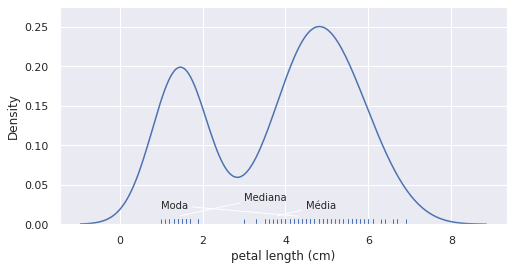

In [174]:
fig = plt.figure(figsize=(8, 4))
ax = sns.distplot(so,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(4.35,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(1.4, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(3.76, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()


Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

Correlação entre diferentes recursos usando o mapa de correlação

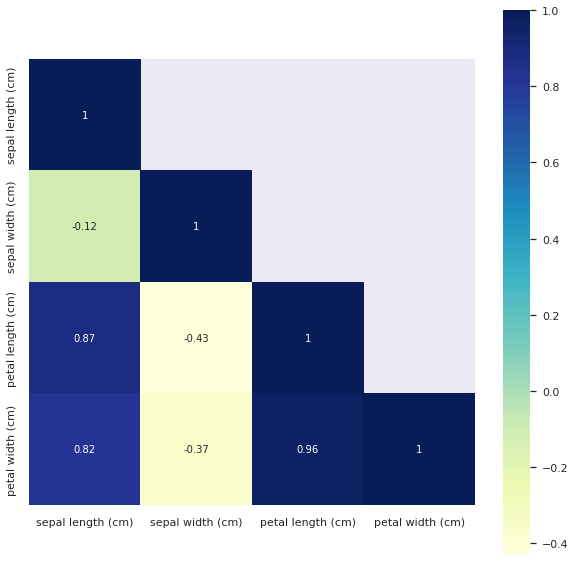

In [175]:
correlation= data.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

In [176]:
correlation['petal length (cm)'].sort_values(ascending=False)

petal length (cm)    1.000000
petal width (cm)     0.962865
sepal length (cm)    0.871754
sepal width (cm)    -0.428440
Name: petal length (cm), dtype: float64

Como era de se esperar o comprimento e largura das pétalas possuem forte correlação, assim como o comprimento e largura das sépalas também estão correlacionados

##**Aprendendo sobre o atributo** ***petal width***

In [178]:
df['petal width (cm)']=pd.to_numeric(df['petal width (cm)'],errors='coerce')

In [179]:
data['petal width (cm)'].value_counts().sort_index()

0.1     5
0.2    29
0.3     7
0.4     7
0.5     1
0.6     1
1.0     7
1.1     3
1.2     5
1.3    13
1.4     8
1.5    12
1.6     4
1.7     2
1.8    12
1.9     5
2.0     6
2.1     6
2.2     3
2.3     8
2.4     3
2.5     3
Name: petal width (cm), dtype: int64

Gráfico de barras do atributo petal width das 25 primeiras amostras

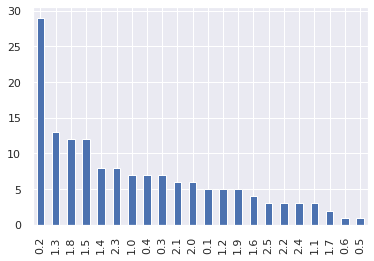

In [180]:
data['petal width (cm)'].value_counts().head(25).plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


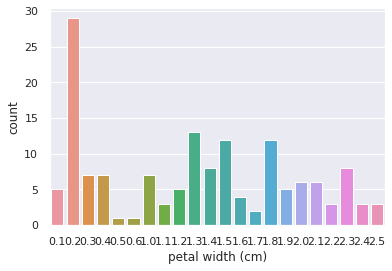

In [182]:
sns.countplot(data['petal width (cm)'], data=data1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


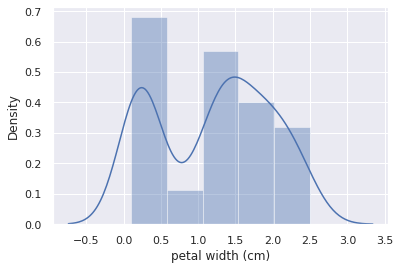

In [185]:
sns.distplot(data['petal width (cm)'])

O Countplot é um gráfico em formato de barra, onde “x” é o atributo escolhido, e “y” é a quantidade de vezes que esse atributo aparece.

Text(0.5, 1.0, 'As 30 medidas mais frequentes do atributo Petal Width')

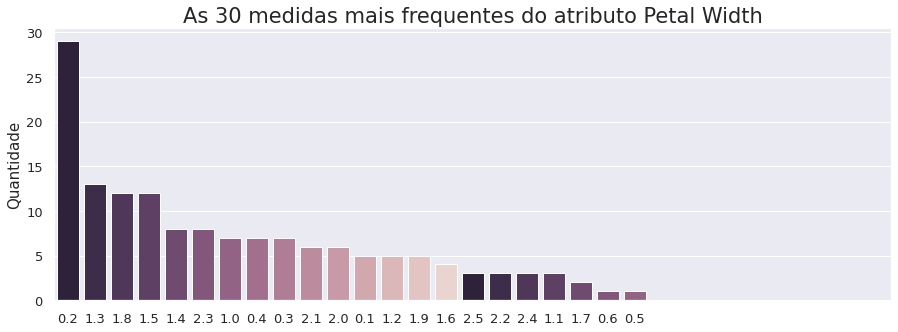

In [206]:
palette_genre_cubehelix = sns.cubehelix_palette(15,reverse=True)
fig = plt.figure(figsize=(15,5))
sns.countplot(x=data['petal width (cm)'], order = data['petal width (cm)'].value_counts().index ,palette=palette_genre_cubehelix,data=data)
plt.xlim(-0.5,30.5)
plt.xlabel('')
plt.ylabel('Quantidade',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('As 30 medidas mais frequentes do atributo Petal Width',fontsize=21)

Calculando a média aritmética

In [190]:
data1['petal width (cm)'].mean()

1.199333333333334

In [191]:
PETALWIDTH = data1['petal width (cm)']

In [192]:
PETALWIDTH.mean()

1.199333333333334

Média geométrica

In [193]:
gmean(PETALWIDTH)

0.8417075469176013

Média Harmônica

In [194]:
hmean(PETALWIDTH)

0.49467077749202265

Mediana

In [195]:
PETALWIDTH.median()

1.3

Moda

In [196]:
PETALWIDTH.mode()

0    0.2
dtype: float64

*Variância*

In [197]:
PETALWIDTH.var()

0.5810062639821029

Desvio padrão

In [198]:
PETALWIDTH.std()

0.7622376689603465

Valor máximo

In [199]:
PETALWIDTH.max()

2.5

Valor mínimo

In [200]:
PETALWIDTH.min()

0.1

MEDIDAS DE ASSIMETRIA

Função para calcular estatísticas

In [201]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

In [202]:
s1 = data1['petal width (cm)']

In [203]:
calcula_estatisticas(s1)

Media: 1.2
Moda: 1.3
Mediana: 0.2
Variância: 0.58
Desvio Padrão: 0.76
Coeficiente Person: -0.1
Coeficiente de Kurtosi: -1.34


Como nesse caso a média, a moda e a mediana tem valores bem próximos, temos uma  Distribuição  quase Simétrica.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


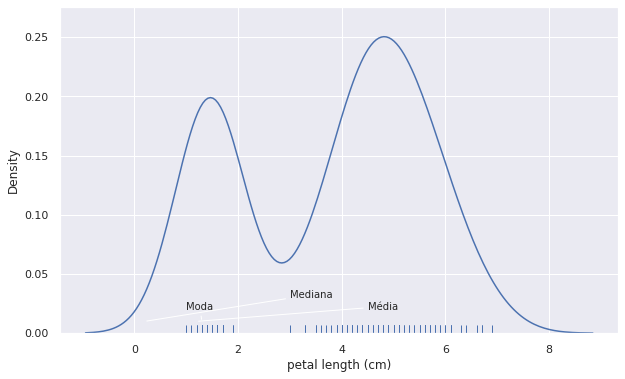

In [205]:
fig = plt.figure(figsize=(10, 6))
ax = sns.distplot(so,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(1.3,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(0.2, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(1.2, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()


Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

In [207]:
correlation['petal width (cm)'].sort_values(ascending=False)

petal width (cm)     1.000000
petal length (cm)    0.962865
sepal length (cm)    0.817941
sepal width (cm)    -0.366126
Name: petal width (cm), dtype: float64